In [47]:
import matplotlib.pyplot as plt
import math as m
from scipy.stats import norm
import numpy as np

Bivariate Normal Distribution (Independent and Correlated)

In [74]:
def generate_random_seq(seed, n):
    rand_seq = [seed]
    for i in range(1, n+1):
        rand_seq.append(7**5 * rand_seq[i-1] % (2**31 - 1))
    return rand_seq[1:]

In [24]:
def generate_normal(seed, n):
    rand = generate_random_seq(seed, n*2)
    U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand[:n]))
    U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand[n:]))

    Z1 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.cos(2*m.pi*u2), U1, U2))
    Z2 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.sin(2*m.pi*u2), U1, U2))

    return Z1, Z2

In [26]:
Z1, Z2 = generate_normal(7, 10000)
mu1 = mu2 = 0
sigma1 = sigma2 = 1
corr = -0.7

x = list(map(lambda z1: mu1 + sigma1*z1, Z1[:1000]))
y = list(map(lambda z1, z2: mu2 + corr * sigma2 * z1 + m.sqrt(1 - corr**2) * sigma2 * z2, Z1[:1000], Z2[:1000] ))

Expected Value sing Monte Carlo

In [28]:
mu1 = mu2 = 0
sigma1 = sigma2 = 1
corr = 0.6

X = list(map(lambda z1: mu1 + z1 * sigma1, Z1))
Y = list(map(lambda z1, z2: mu2 + corr * sigma2 * z1 + m.sqrt(1 - corr**2) * sigma2 * z2, Z1, Z2))

h = list(map(lambda x,y: x**3 + m.sin(y) + x**2*y if x**3 + m.sin(y) + x**2*y>0 else 0, X, Y))

E = sum(h)/len(h)

1.5405961241013213

In [36]:
W5 = list(map(lambda z: z*m.sqrt(5), Z1[:5000]))
f_w5 = list(map(lambda w: w**2 + m.sin(w), W5))

E_W5 = sum(f_w5)/len(f_w5)

sd1 = m.sqrt(sum(map(lambda x: (x - E_W5)**2 , f_w5))/len(f_w5))
sd1

7.318116853828135

In [ ]:
Variance Reduction Technique (Antithetics)

In [42]:
corr = - 0.6
X5 = list(map(lambda z1, z2: corr * m.sqrt(5) * z1 + m.sqrt(1 - corr**2) * m.sqrt(5) * z2, Z1[:5000], Z2[:5000]))
f_X5 = list(map(lambda w: w**2 + m.sin(w), X5))

h_W5 = list(map(lambda x,y: (x+y)/2, f_w5, f_X5))
Eh_W5 = sum(h_W5)/len(h_W5)

sd2 = m.sqrt(sum(map(lambda x: (x-Eh_W5)**2, h_W5))/ len(h_W5))
sd2

6.072874292839966

Option pricing using Monte Carlo

In [43]:
T = 5
S0 = 88
r = 0.04
sd = 0.2
K = 100

WT = list(map(lambda z: m.sqrt(T)*z, Z1[:5000])) 

ST = list(map(lambda w: S0*m.exp(sd*w + (r - 0.5*sd**2)*T), WT))

call_payoffs = list(map(lambda s: s - K if (s - K) > 0 else 0, ST))
call_price = m.exp(-r*T)*sum(call_payoffs)/len(call_payoffs)
call_price

18.382943974312404

In [44]:
Z1_inv = list(map(lambda z: -z, Z1))
WT_inv = list(map(lambda z: z*m.sqrt(5), Z1_inv))

ST_inv = list(map(lambda w: S0*m.exp(sd*w + (r - 0.5*sd**2)*T), WT_inv))
call_payoffs_inv = list(map(lambda s: s - K if (s - K) > 0 else 0, ST_inv))

call_payoff_corrected = list(map(lambda x, y: (x+y)/2, call_payoffs, call_payoffs_inv))
call_price_corrected = m.exp(-r*T)*sum(call_payoff_corrected)/len(call_payoff_corrected)

call_price_corrected

18.590969240977547

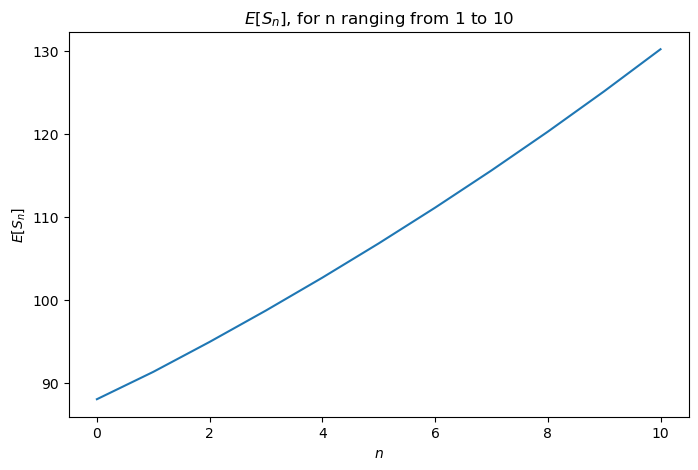

In [48]:
Z = Z1[:1000]

S0 = 88
r = 0.04
sd = 0.18

def expected_stock_value(sd, t):
    Wt = list(map(lambda z: m.sqrt(t)*z, Z))
    St = St = list(map(lambda w: S0*m.exp(sd*w + (r - 0.5*sd**2)*t), Wt))
    ESt = sum(St)/len(St)
    return ESt

n = list(range(1, 11))
ESn_list =  [S0] + list(map(lambda t: expected_stock_value(sd, t), n))

plt.figure(figsize=(8,5))
plt.plot(ESn_list)
plt.title('$E[S_n]$, for n ranging from 1 to 10')
plt.xlabel('$n$')
plt.ylabel('$E[S_n]$')
plt.show()


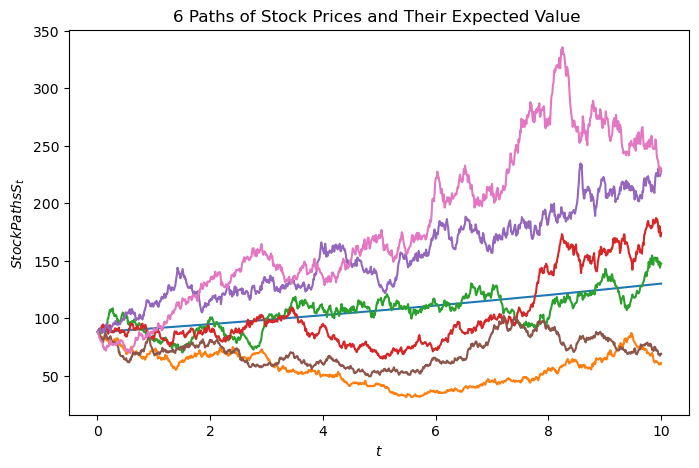

In [70]:
dt = 10/1000
t = list(map(lambda x: x/100, range(1, 1001)))

Z6 = generate_normal(7, 6000)[0]

split_points = list(range(0, 6000, 1000))
Z_list = [Z6[i:i+1000] for i in split_points]

r_St = [list(map(lambda z: r*dt + sd*m.sqrt(dt)*z, Z_list[i])) for i in range(len(Z_list))]

def stock_prices(r_St, t):
    St = [S0]
    for i in range(1, len(r_St)+1):
        St.append(St[i-1]*m.exp(r_St[i-1]))
    St = list(zip(t, St))
    return St

stock_paths = [stock_prices(r_St[i], t) for i in range(len(r_St))]

plt.figure(figsize=(8,5))
plt.plot(ESn_list)
for i in stock_paths:
    plt.plot(*zip(*i))
plt.title('6 Paths of Stock Prices and Their Expected Value ')
plt.xlabel('$t$')
plt.ylabel('$Stock Paths S_t$')
plt.show()


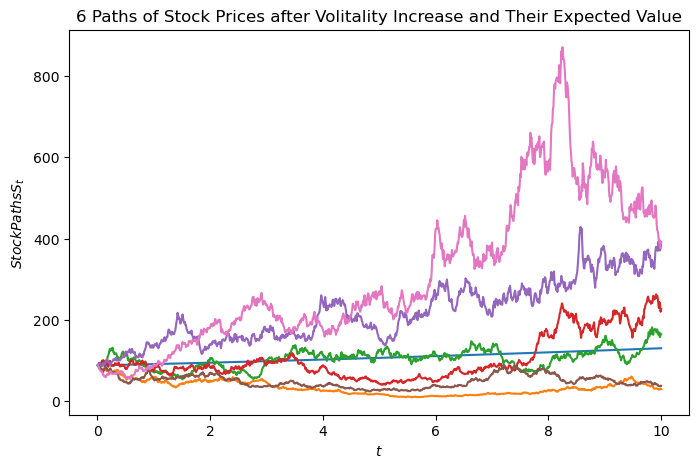

In [71]:
S0 = 88
r = 0.04
sd_new = 0.35

ESn_list_new =  [S0] + list(map(lambda t: expected_stock_value(sd_new, t), n))
r_St_new = [list(map(lambda z: r*dt + sd_new*m.sqrt(dt)*z, Z_list[i])) for i in range(len(Z_list))]
stock_paths_new = [stock_prices(r_St_new[i], t) for i in range(len(r_St))]
plt.figure(figsize=(8,5))
plt.plot(ESn_list_new)
for i in stock_paths_new:
    plt.plot(*zip(*i))
plt.title('6 Paths of Stock Prices after Volitality Increase and Their Expected Value')
plt.xlabel('$t$')
plt.ylabel('$Stock Paths S_t$')
plt.show()

Eulers Discretization for Integral

In [72]:
n = 1000 # number of steps
I = [0]  # list of Euler integral values
dt = 1/n

t = list(map(lambda t: t*dt, range(int(n+1))))
for i in range(1, n+1):
    I.append(I[i-1] + m.sqrt(1-t[i-1]**2)*dt)

estimated_y = I[-1]
integral = estimated_y*4
integral

3.143555466911028

In [76]:
rand2 = generate_random_seq(9, 1000)
U = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand2))

integral_mc = sum(map(lambda u: 4*m.sqrt(1-u**2), U))/ len(U)
integral_mc

3.1480716328273215

Importance Samplng for Improving Approximation of Pi

In [78]:
# define g(x)
g = 1 / (1- (0.74/3))

# define h(x)
t = lambda x: (1 - 0.74*x**2)/(1- 0.74/3) if 0 <= x <= 1 else 0

def accept_reject(n):
    """
        Generate sample of X with acceptance-rejection method
    """
    np.random.seed(9)
    sample = []
    while n > 0:
        # generate sample for U
        u = np.random.uniform(0, 1)
        # generate sample of Y
        y = np.random.uniform(0, 1)
        
        if u <= t(y)/g:
            sample.append(y)
            n -= 1
        else:
            pass
    return sample

sample = accept_reject(1000)
integral_importance = sum(map(lambda x: 4*m.sqrt(1-x**2)/t(x), sample))/len(sample)
integral_importance

3.143273475357075

In [81]:
pi_seq = list(map(lambda u: 4*m.sqrt(1-u**2), U))
pi_seq2 = list(map(lambda x: 4*m.sqrt(1-x**2)/t(x), sample))

pi_sd_before = m.sqrt(sum(map(lambda p: (p - integral_mc)**2 ,pi_seq))/len(pi_seq))

pi_sd_after =  m.sqrt(sum(map(lambda p: (p - integral_importance)**2 ,pi_seq2))/len(pi_seq2))

print("Before variance reduction:\n")
print("Standard deviation of the integral Monte Carlo Simulation: ", round(pi_sd_before, 5))
print('\n')
print("After variance reduction:\n")
print("Standard deviation of integral Monte Carlo Simulation_Importance Sampling: ", round(pi_sd_after, 5))

Before variance reduction:

Standard deviation of the integral Monte Carlo Simulation:  0.88963


After variance reduction:

Standard deviation of integral Monte Carlo Simulation_Importance Sampling:  0.20842
